<h1>비지도학습</h1>

<h2>K-means</h2>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


matplotlib.rcParams['axes.unicode_minus'] = False

np.random.seed(1)
N = 100
K = 3
T3 = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3]
X_range1 = [-3, 3]
X_col = ["red", "black", "white"]
Mu = np.array([[-.5, -.5],[.5, 1.0], [1, -.5]])
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]])
Pi = np.array([0.4, 0.8, 1])
for n in range(N):
    wk = np.random.rand()
    #print(wk)
    for k in range(K):
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] ==1, k]
                   +Mu[T3[n, :] == 1, k])
print(Sig[[True, True, False], 0])

[0.7 0.8]


In [0]:
def show_data(x):
    plt.plot(x[:, 0], x[:, 1], ls="",
            marker="o", markersize=6,
            markeredgecolor="k",
            color="gray", alpha=0.8)
    plt.grid()

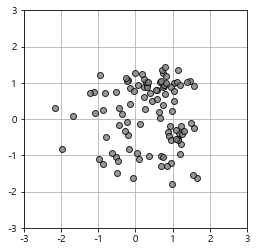

In [0]:
plt.figure(1, figsize=(4, 4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez("l_d/p3/data_ch9.npz", X=X, X_range0=X_range0,
        X_range1=X_range1)

In [0]:
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]

In [0]:
R[:, 0] == 1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [0]:
def show_prm(x, r, mu, col):
    for k in range(K):
        plt.plot(x[r[:, k] == 1, 0], x[r[:, k] == 1, 1],
                marker="o",
                markerfacecolor=X_col[k],
                markeredgecolor="k",
                markersize=6, alpha=0.5,
                ls="")
        plt.plot(mu[k, 0], mu[k, 1], marker="*",
                markerfacecolor=X_col[k],
                markeredgecolor="k",
                markersize=15,
                markeredgewidth=1)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    plt.grid()

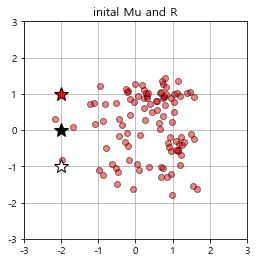

In [0]:
plt.figure(figsize=(4, 4))
R = np.c_[np.ones((N, 1)), np.zeros((N, 2))]
show_prm(X, R, Mu, X_col)
plt.title("inital Mu and R")
plt.show()

In [0]:
def step1_kmeans(x0, x1, mu):
    N = len(x0)
    r = np.zeros((N, K))
    for n in range(N):
        wk = np.zeros(K)
        for k in range(K):
            wk[k] = (x0[n] - mu[k, 0])**2 + (x1[n] - mu[k, 1])**2
        r[n, np.argmin(wk)] = 1
    return r

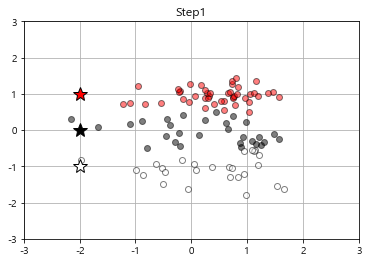

In [0]:
plt.figure()
R = step1_kmeans(X[:, 0], X[:, 1], Mu)
show_prm(X, R, Mu, X_col)
plt.title("Step1")
plt.show()

In [0]:
def step2_kmeans(x0, x1, r):
    mu = np.zeros((K, 2))
    for k in range(K):
        mu[k, 0] = np.sum(r[:, k] * x0) / np.sum(r[:, k])
        mu[k, 1] = np.sum(r[:, k] * x1) / np.sum(r[:, k])
    return mu

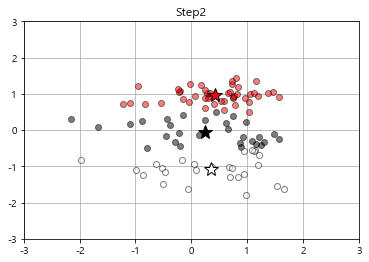

In [0]:
plt.figure()
Mu = step2_kmeans(X[:, 0], X[:, 1], R)
show_prm(X, R, Mu, X_col)
plt.title("Step2")
plt.show()

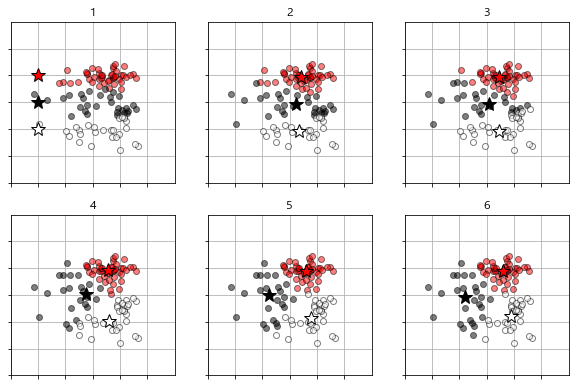

In [0]:
plt.figure(1, figsize=(10, 6.5))
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
max_it = 6
for it in range(0, max_it):
    plt.subplot(2, 3, it + 1)
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    show_prm(X, R, Mu, X_col)
    plt.title(f"{it + 1:d}")
    plt.xticks(range(X_range0[0], X_range0[1]), "")
    plt.yticks(range(X_range1[0], X_range1[1]), "")
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
plt.show()

In [0]:
def distortion_measure(x0, x1, r, mu):
    N = len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J = J + r[n, k] * ((x0[n] - mu[k, 0])**2 +
                              (x1[n] - mu[k, 1])**2)
    return J

In [0]:
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
distortion_measure(X[:, 0], X[:, 1], R, Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


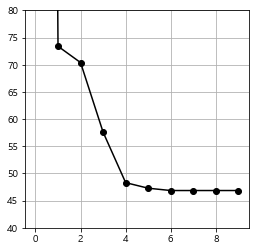

In [0]:
N = X.shape[0]
K = 3
Mu = np.array([[-2, 1], [-2, 0], [-2, -1]])
R = np.c_[np.ones((N, 1), dtype=int), np.zeros((N, 2), dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it)
for it in range(0, max_it):
    R = step1_kmeans(X[:, 0], X[:, 1], Mu)
    DM[it] = distortion_measure(X[:, 0], X[:, 1], R, Mu)
    Mu = step2_kmeans(X[:, 0], X[:, 1], R)
print(np.round(DM, 2))
plt.figure(2, figsize=(4, 4))
plt.plot(DM, color="k", ls="-", marker="o")
plt.ylim(40, 80)
plt.grid()
plt.show()

In [0]:
wk = np.load("l_d/p3/data_ch9.npz")
X = wk["X"]
X_range0 = wk["X_range0"]
X_range1 = wk["X_range1"]

In [0]:
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2*np.pi)**(D/2)
    c2 = 1 / (np.linalg.det(sigma)**(1/2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d]*c3[:, d]
    p = c1*c2*np.exp(-c5/2)
    return p

In [0]:
x = np.array([[1, 2], [2, 1], [3, 4]])
mu = np. array([1, 2])
sigma = np.array([[1, 0], [0, 1]])
print(gauss(x, mu, sigma))

[0.15915494 0.05854983 0.00291502]


In [0]:
def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p = p + pi[k]*gauss(x, mu[k, :], sigma[k, :, :])
    return p

In [0]:
x = np.array([[1, 2], [2, 2], [3, 4]])
pi = np.array([0.3, 0.7])
mu = np.array([[1, 1], [2, 2]])
sigma = np.array([[[1, 0], [0, 1]], [[2, 0], [0, 1]]])
print(mixgauss(x, pi, mu, sigma))

[0.09031182 0.09634263 0.00837489]


In [0]:
from mpl_toolkits.mplot3d import axes3d


def show_contour_mixgauss(pi, mu, sigma):
    xn = 40
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    plt.contour(x0, x1, f, 10, colors="gray")

In [0]:
def show3d_mixgauss(ax, pi, mu, sigma):
    xn = 40
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, rstride=2, cstride=2,
                   alpha=.3, color="b", edgecolor="k")

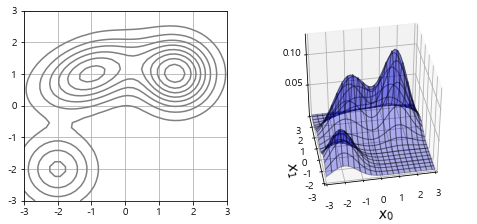

In [0]:
pi = np.array([0.2, 0.4, 0.4])
mu = np.array([[-2, -2], [-1, 1], [1.5, 1]])
sigma = np.array([[[.5, 0], [0, .5]], [[1, 0.25], [.250, .5]],
                  [[.5, 0], [0, .5]]])
Fig = plt.figure(1, figsize=(8, 3.5))
Fig.add_subplot(1, 2, 1)
show_contour_mixgauss(pi, mu, sigma)
plt.grid()

Ax = Fig.add_subplot(1, 2, 2, projection="3d")
show3d_mixgauss(Ax, pi, mu, sigma)
Ax.set_zticks([0.05, 0.10])
Ax.set_xlabel("$x_0$", fontsize=14)
Ax.set_ylabel("$x_1$", fontsize=14)
Ax.view_init(40, -100)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()